In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"D:\Year 3 Sem 2\Godamlah\Deepfake\deepfake model ver2\data\KAGGLE\DATASET-balanced.csv"  # Replace with the actual path
data = pd.read_csv(file_path)

# Open a file to save text outputs
output_file = "eda_results.txt"
with open(output_file, "w") as f:
    # Dataset info
    f.write("Dataset Info:\n")
    data.info(buf=f)
    f.write("\n\n")

    # First few rows
    f.write("First Few Rows:\n")
    f.write(data.head().to_string())
    f.write("\n\n")

    # Label distribution
    f.write("Label Distribution:\n")
    f.write(data['LABEL'].value_counts().to_string())
    f.write("\n\n")

    # Summary statistics
    f.write("Summary Statistics:\n")
    f.write(data.describe().to_string())
    f.write("\n\n")

# Save plots
# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='LABEL', data=data, palette='viridis')
plt.title("Label Distribution (Real vs Fake)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.savefig("label_distribution.png")
plt.close()

# Correlation heatmap for numeric features
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.close()

# Pairplot for selected features
selected_features = ['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'rolloff']
pairplot = sns.pairplot(data[selected_features + ['LABEL']], hue='LABEL', palette='muted')
pairplot.fig.suptitle("Pair Plot for Selected Features", y=1.02)  # Add title
pairplot.savefig("pairplot_features.png")  # Save the pair plot as an image
plt.close()

# Histogram for a single feature (example: 'spectral_centroid')
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='spectral_centroid', hue='LABEL', kde=True, palette='plasma', bins=30)
plt.title("Spectral Centroid Distribution by Label")
plt.xlabel("Spectral Centroid")
plt.ylabel("Count")
plt.savefig("spectral_centroid_distribution.png")
plt.close()

# Boxplot for MFCC1 feature
plt.figure(figsize=(8, 5))
sns.boxplot(x='LABEL', y='mfcc1', data=data, palette='cool')
plt.title("MFCC1 Distribution by Label")
plt.xlabel("Label")
plt.ylabel("MFCC1")
plt.savefig("mfcc1_boxplot.png")
plt.close()

# Scatter plot of two features for comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mfcc1', y='mfcc2', hue='LABEL', data=data, palette='viridis', alpha=0.7)
plt.title("MFCC1 vs MFCC2 by Label")
plt.xlabel("MFCC1")
plt.ylabel("MFCC2")
plt.savefig("mfcc1_vs_mfcc2_scatterplot.png")
plt.close()

print(f"EDA results saved to {output_file} and plots saved as images.")


C:\Users\60165\AppData\Local\Temp\ipykernel_7844\1133509834.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LABEL', data=data, palette='viridis')
C:\Users\60165\AppData\Local\Temp\ipykernel_7844\1133509834.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LABEL', y='mfcc1', data=data, palette='cool')


EDA results saved to eda_results.txt and plots saved as images.


In [8]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


file_path = "D:\Year 3 Sem 2\Godamlah\Deepfake\deepfake model ver2\data\KAGGLE\DATASET-balanced.csv" 
data = pd.read_csv(file_path)
label_encoder = LabelEncoder()
data['LABEL'] = label_encoder.fit_transform(data['LABEL'])
X = data.drop(columns=['LABEL'])  # Features
y = data['LABEL']  # Target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])  # Print the first 5 rows
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

[[-1.20870243 -0.35433264  0.11600862  1.45905208  0.73406442 -0.75770255
  -1.0002166  -1.51283841  1.57869371  0.12169303  0.30874689 -0.09985594
  -0.22540809  0.48798638 -0.07842056 -0.02501252 -1.54533695 -0.33966485
   0.49981805 -0.96192457  0.28691702  1.13541067 -0.36240619  0.81808684
  -0.45569877 -0.42925661]
 [ 0.31475963 -0.0019996  -0.35911539  0.4534135  -0.55881603 -0.58768819
  -0.33736774 -0.68277345  0.63252051 -0.72050199  0.7401398   0.3748738
   0.32256342  0.71840865  0.29380564  0.43906997  0.33846748  0.34902153
  -1.01897166  0.13988135  0.59749513 -0.67144375  0.26330272  0.27319016
  -1.36841986 -0.7423602 ]
 [-1.72070247  0.66561629 -0.02457369 -0.21687929 -0.12027626  0.24232803
   0.79867134 -0.67886417  0.00267462  0.1147616  -0.16986157 -0.75927231
  -0.16119787 -0.04654788  0.0652976   0.25319791 -0.11088291 -0.21375626
  -0.40359818 -0.84517045 -0.51128307 -0.78732681  0.50592688  0.3014268
  -0.23566951 -0.47560827]
 [-1.469869   -0.2276495  -0.4476

In [9]:


# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
# Save the entire model (architecture + weights)
model.save('deepvoice_1.h5')  # Saves the model to a .h5 file


Epoch 1/10
295/295 [==============================] - 3s 8ms/step - loss: 0.2858 - accuracy: 0.8885 - val_loss: 0.1076 - val_accuracy: 0.9741
Epoch 2/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0709 - accuracy: 0.9825 - val_loss: 0.0549 - val_accuracy: 0.9843
Epoch 3/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0399 - accuracy: 0.9895 - val_loss: 0.0476 - val_accuracy: 0.9864
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0302 - accuracy: 0.9914 - val_loss: 0.0352 - val_accuracy: 0.9898
Epoch 5/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0231 - accuracy: 0.9941 - val_loss: 0.0329 - val_accuracy: 0.9911
Epoch 6/10
295/295 [==============================] - 1s 5ms/step - loss: 0.0191 - accuracy: 0.9946 - val_loss: 0.0295 - val_accuracy: 0.9928
Epoch 7/10
295/295 [==============================] - 2s 5ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0286 - val_accuracy: 0.9924
Epoch 

74/74 [==============================] - 0s 2ms/step
Confusion Matrix:
[[1180   13]
 [   4 1159]]

Detailed Confusion Matrix Values:
True Positives (TP): 1159
True Negatives (TN): 1180
False Positives (FP): 13
False Negatives (FN): 4

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1193
           1       0.99      1.00      0.99      1163

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356


Accuracy Score:
0.9927843803056027


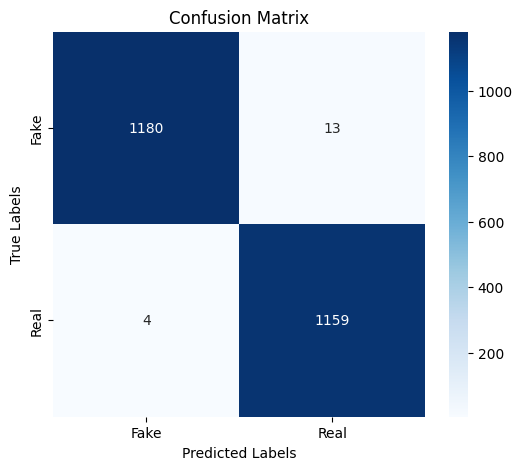

In [10]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('deepvoice_1.h5')

# Make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Convert predictions to binary (0 or 1) based on a threshold (0.5 for binary classification)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Detailed breakdown of confusion matrix
TP = cm[1, 1]  # True Positive
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative

print("\nDetailed Confusion Matrix Values:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Classification Report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Accuracy Score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_binary))

# Visualization of the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [11]:
import joblib
from sklearn.preprocessing import StandardScaler

# Fit the scaler on training data
scaler = StandardScaler()
scaler.fit(X_train)  # X_train should be the training features

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [15]:

# Feature Extraction from a Real-Life WAV Audio File

import librosa

# Path to the audio file (update with your WAV file path)
audio_file = r'D:\Year 3 Sem 2\Godamlah\Deepfake\deepfake model ver2\data\real life test audio\human voice 1 to mr beast.wav'

# Load the audio file with librosa
y, sr = librosa.load(audio_file, sr=None, mono=True)

# Extract 26 features as described in the study
features = {}

# Chromagram
features['chromagram'] = librosa.feature.chroma_stft(y=y, sr=sr).mean()

# Root Mean Square Energy
features['rms'] = librosa.feature.rms(y=y).mean()

# Spectral Centroid
features['spectral_centroid'] = librosa.feature.spectral_centroid(y=y, sr=sr).mean()

# Spectral Bandwidth
features['spectral_bandwidth'] = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()

# Spectral Rolloff
features['spectral_rolloff'] = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()

# Zero Crossing Rate
features['zero_crossing_rate'] = librosa.feature.zero_crossing_rate(y=y).mean()

# First 20 MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
for i in range(20):
    features[f'mfcc_{i+1}'] = mfccs[i].mean()

# Display the extracted features
print("Extracted Features:")
for key, value in features.items():
    print(f"{key}: {value}")

# You can now use these features as input for the classification model in the notebook.


Extracted Features:
chromagram: 0.3742460310459137
rms: 0.06360475718975067
spectral_centroid: 2175.505518328324
spectral_bandwidth: 2030.7810265930118
spectral_rolloff: 3988.1833994736407
zero_crossing_rate: 0.0990459735576923
mfcc_1: -256.6141052246094
mfcc_2: 88.50127410888672
mfcc_3: -29.0674991607666
mfcc_4: 35.0979118347168
mfcc_5: 5.889753341674805
mfcc_6: -15.115578651428223
mfcc_7: 3.201129198074341
mfcc_8: -7.313312530517578
mfcc_9: -21.44521713256836
mfcc_10: 1.0151087045669556
mfcc_11: -7.059329509735107
mfcc_12: -8.663232803344727
mfcc_13: -4.679325580596924
mfcc_14: 1.6387262344360352
mfcc_15: -5.745546340942383
mfcc_16: -3.1331677436828613
mfcc_17: -9.093478202819824
mfcc_18: -2.6660284996032715
mfcc_19: -5.211463928222656
mfcc_20: -5.886329650878906


In [16]:
import numpy as np
from tensorflow.keras.models import load_model

# Path to the saved model
model_path = "deepvoice_1.h5"

# Load the pre-trained model
model = load_model(model_path)

# Example features array from extracted data (replace with actual extracted features from the new block)
# Ensure the order matches the training data's feature columns
features = np.array([
    [
        features['chromagram'], features['rms'], features['spectral_centroid'], 
        features['spectral_bandwidth'], features['spectral_rolloff'], features['zero_crossing_rate']
    ] + [features[f'mfcc_{i+1}'] for i in range(20)]
])

# Reshape the features for model input if necessary (e.g., add batch dimension)
features = features.reshape(1, -1)  # Shape: (1, num_features)

# Predict the class probabilities
prediction = model.predict(features)

# Output the prediction probabilities
print(f"Prediction Probabilities: {prediction}")

# Extract the predicted class and its confidence
predicted_class = np.argmax(prediction, axis=1)[0]  # Get the class index
confidence = prediction[0][predicted_class]  # Confidence of the predicted class

# Output the results
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence * 100:.2f}%")


1/1 [==============================] - 0s 46ms/step
Prediction Probabilities: [[1.]]
Predicted Class: 0
Confidence: 100.00%
